<a href="https://colab.research.google.com/github/mona-jha/cv-assignment/blob/main/Harris_corner_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name :** Mona Kumari

**Roll No :** CS2311

**M.Tech CS 2nd Year**

# **Harris corner detector**


In [ ]:
# Download the image using gdown
!gdown 1E9iL4CKEMI9UEwyOSSmYl0CyWBQ-lEtd

Downloading...
From: https://drive.google.com/uc?id=1E9iL4CKEMI9UEwyOSSmYl0CyWBQ-lEtd
To: /content/cat.jpg
100% 321k/321k [00:00<00:00, 110MB/s]


In [ ]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def harris_corner_detector(image, window_size=3, k=0.04, threshold=0.01):
    """
    Harris Corner Detector from scratch.

    Parameters:
    image: Input grayscale image
    window_size: Size of the window (neighborhood) for corner detection
    k: Harris detector free parameter (sensitivity to corners)
    threshold: Threshold for detecting strong corners

    Returns:
    corners: Binary image where corners are marked
    harris_response: Harris corner response matrix
    """
    # Step 1: Compute image gradients using Sobel operator
    Ix = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Step 2: Compute products of derivatives
    Ixx = Ix ** 2
    Iyy = Iy ** 2
    Ixy = Ix * Iy

    # Step 3: Apply Gaussian filtering to the products of derivatives
    Sxx = cv2.GaussianBlur(Ixx, (window_size, window_size), 1)
    Syy = cv2.GaussianBlur(Iyy, (window_size, window_size), 1)
    Sxy = cv2.GaussianBlur(Ixy, (window_size, window_size), 1)

    # Step 4: Compute the Harris response matrix for each pixel
    harris_response = np.zeros_like(image, dtype=np.float64)

    # Harris corner response formula: R = det(M) - k * trace(M)^2
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            M = np.array([[Sxx[y, x], Sxy[y, x]],
                          [Sxy[y, x], Syy[y, x]]])
            det_M = np.linalg.det(M)
            trace_M = np.trace(M)
            harris_response[y, x] = det_M - k * (trace_M ** 2)

    # Step 5: Threshold the response to identify strong corners
    corners = np.zeros_like(image, dtype=np.uint8)
    max_response = np.max(harris_response)
    corners[harris_response > threshold * max_response] = 255

    return corners, harris_response


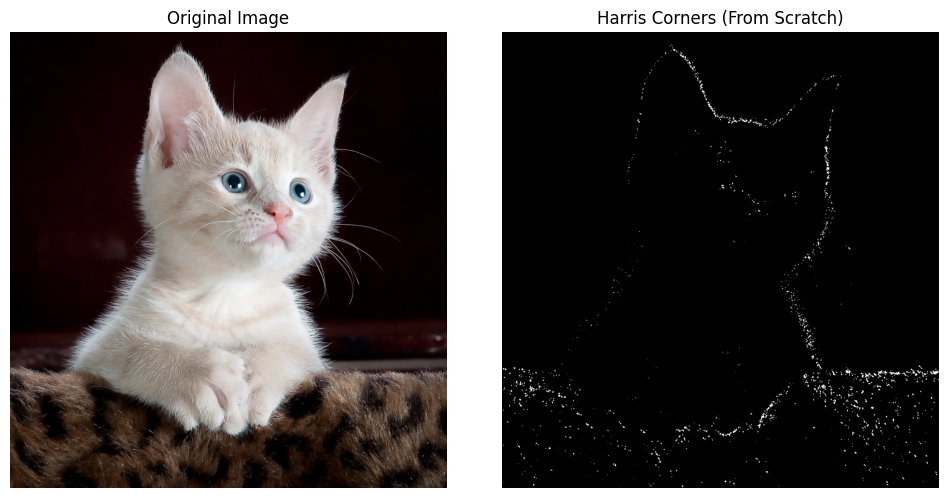

In [ ]:
# Read the image in grayscale
gray_image = cv2.imread('/content/cat.jpg', cv2.IMREAD_GRAYSCALE)

# Parameters for Harris corner detection
window_size = 3  # Neighborhood size (Gaussian window size)
k = 0.04         # Harris detector free parameter
threshold = 0.01  # Threshold for detecting strong corners

# Run the Harris corner detector
corners_image, harris_response = harris_corner_detector(gray_image, window_size, k, threshold)

# Plot the original image and the result with detected corners
image = plt.imread('/content/cat.jpg')
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Harris Corners (From Scratch)")
plt.imshow(corners_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

End

---